In [1]:
import xbbg
from xbbg import blp
import numpy as np
import pandas as pd
import datetime as DT
import matplotlib.pyplot as plt
import sklearn as sklearn
from sklearn.decomposition import PCA
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
pd.options.display.float_format = '{:,.2f}'.format

c:\users\boris\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
c:\users\boris\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1

In [2]:
today = DT.date.today()
startdate = '1/1/2003'
enddate = today

In [3]:
def get_reference_df(tickers_list):
    name=blp.bds(tickers_list,flds=["NAME",])
    name.rename(columns={"value":"NAME"}, inplace=True)
    seas=blp.bds(tickers_list,fld=["SEASONALITY_AND_TRANSFORMATION"])
    seas.rename(columns={"value":"SEAS"}, inplace=True)
    
    return name.join(seas)#.join(unts).join(ccy).join(freq).join(last_update)

def convert_to_period(df):
    df.columns=ds.columns.get_level_values(0)
    df.index=df.index.to_period("W")
    return df


def get_dict_inv(d):
    return {v: k for k, v in d.items()}

def standardize_data(df):
    return (df-df.mean())/df.std()

In [9]:
tickers={
"BRLFXI" : "BCNI3M BGNL Curncy",
"CNYFXI" : "CNHI3M Curncy",
"CLPFXI" : "CHNI3M CMPN Curncy",
"COPFXI" : "CLNI3M BGNL Curncy",
"CZKFXI" : "CZKI3M Curncy",
"EGPFXI" : "EPNI3M Curncy",
"HUFFXI" : "HUFI3M Curncy",
"ILSFXI" : "ILSI3M Curncy",
"INRFXI" : "IRNI3M BGNL Curncy",
"IDRFXI" : "IHNI3M Curncy",
"MXNFXI" : "MXNI3M Curncy",
"MYRFXI" : "MRNI3M Curncy",
"PLNFXI" : "PLNI3M Curncy",
"RONFXI" : "RONI3M Curncy",
"RUBFXI" : "RUBI3M Curncy",
"ZARFXI" : "ZARI3M Curncy",
"KRWFXI" : "KWNI3M Curncy",
"THBFXI" : "THBI3M Curncy",
"TRYFXI" : "TRYI3M Curncy",
"CADFXI" : "CADI3M Curncy",
"AUDFXI" : "AUDI3M Curncy",
"GBPFXI" : "GBPI3M Curncy",
"USDFXI" : "USGG3M Index",
"EURFXI" : "EURI3M Curncy",
"CHFFXI" : "CHFI3M Curncy",
"JPYFXI" : "JPYI3M Curncy",
"SEKFXI" : "SEKI3M Curncy",
"NOKFXI" : "NOKI3M Curncy",
"NZDFXI" : "NZDI3M Curncy",
"SGDFXI" : "SGDI3M Curncy",
"BRLCPI" : "BZPIIPCY Index",
"CNYCPI" : "CNCPIYOY Index",
"CLPCPI" : "CLINNSYO Index",
"COPCPI" : "COCPIYOY Index",
"CZKCPI" : "CZCPYOY Index",
"EGPCPI" : "EGCPYOY Index",
"HUFCPI" : "HUCPIYY Index",
"ILSCPI" : "ISCPIYYN Index",
"INRCPI" : "INFUTOTY Index",
"IDRCPI" : "IDCPIY Index",
"MXNCPI" : "MXCPYOY Index",
"MYRCPI" : "MACPIYOY Index",
"PLNCPI" : "POCPIYOY Index",
"RONCPI" : "ROCOPYOY Index",
"RUBCPI" : "RUCPIYOY Index",
"ZARCPI" : "SACPIYOY Index",
"KRWCPI" : "KOCPIYOY Index",
"THBCPI" : "THCPIYOY Index",
"TRYCPI" : "TUCPIY Index",
"CADCPI" : "CACPIYOY Index",
"AUDCPI" : "TDMIYOY Index",
"GBPCPI" : "UKRPCJYR Index",
"USDCPI" : "PCE DEFY Index",
"EURCPI" : "ECCPEMUY Index",
"CHFCPI" : "SZCPIYOY Index",
"JPYCPI" : "JNCPIYOY Index",
"SEKCPI" : "SWCPYOY Index",
"NOKCPI" : "NOCPIYOY Index",
"NZDCPI" : "NZCPIYOY Index",
"SGDCPI" : "SICPIYOY Index",

}

In [10]:
df= blp.bdh(tickers.values(),'PX_LAST', startdate, enddate, periodicitySelection = "DAILY")
df.columns = df.columns.get_level_values(0)
df.rename(columns=lambda x:get_dict_inv(tickers)[x], inplace="True")
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)
TIME = df.index
df.tail()

,BRLFXI,CNYFXI,CLPFXI,COPFXI,CZKFXI,EGPFXI,HUFFXI,ILSFXI,INRFXI,IDRFXI,...,AUDCPI,GBPCPI,USDCPI,EURCPI,CHFCPI,JPYCPI,SEKCPI,NOKCPI,NZDCPI,SGDCPI
2022-05-30,12.53,2.27,8.34,7.42,5.91,16.99,6.32,-0.60,5.23,1.88,...,3.40,9.00,6.30,7.40,2.50,2.50,6.40,5.40,6.90,5.40
2022-05-31,12.38,2.39,8.40,7.05,5.95,16.57,6.40,-0.62,5.50,2.09,...,3.40,9.00,6.30,8.10,2.90,2.50,6.40,5.40,6.90,5.40
2022-06-01,12.03,2.39,8.25,6.74,5.91,19.01,6.36,-0.46,5.22,2.45,...,3.40,9.00,6.30,8.10,2.90,2.50,6.40,5.40,6.90,5.40
2022-06-02,12.18,2.31,8.37,7.06,6.01,17.76,6.50,-0.46,5.15,1.95,...,3.40,9.00,6.30,8.10,2.90,2.50,6.40,5.40,6.90,5.40
2022-06-03,12.31,2.33,8.42,7.24,6.00,18.37,6.54,-0.47,4.80,2.02,...,3.40,9.00,6.30,8.10,2.90,2.50,6.40,5.40,6.90,5.40


In [11]:
df["BRLREAL"]=df["BRLFXI"]-df["BRLCPI"]
df["CNYREAL"]=df["CNYFXI"]-df["CNYCPI"]
df["CLPREAL"]=df["CLPFXI"]-df["CLPCPI"]
df["COPREAL"]=df["COPFXI"]-df["COPCPI"]
df["CZKREAL"]=df["CZKFXI"]-df["CZKCPI"]
df["EGPREAL"]=df["EGPFXI"]-df["EGPCPI"]
df["HUFREAL"]=df["HUFFXI"]-df["HUFCPI"]
df["ILSREAL"]=df["ILSFXI"]-df["ILSCPI"]
df["INRREAL"]=df["INRFXI"]-df["INRCPI"]
df["IDRREAL"]=df["IDRFXI"]-df["IDRCPI"]
df["MXNREAL"]=df["MXNFXI"]-df["MXNCPI"]
df["MYRREAL"]=df["MYRFXI"]-df["MYRCPI"]
df["PLNREAL"]=df["PLNFXI"]-df["PLNCPI"]
df["RONREAL"]=df["RONFXI"]-df["RONCPI"]
df["RUBREAL"]=df["RUBFXI"]-df["RUBCPI"]
df["ZARREAL"]=df["ZARFXI"]-df["ZARCPI"]
df["KRWREAL"]=df["KRWFXI"]-df["KRWCPI"]
df["THBREAL"]=df["THBFXI"]-df["THBCPI"]
df["TRYREAL"]=df["TRYFXI"]-df["TRYCPI"]
df["CADREAL"]=df["CADFXI"]-df["CADCPI"]
df["AUDREAL"]=df["AUDFXI"]-df["AUDCPI"]
df["GBPREAL"]=df["GBPFXI"]-df["GBPCPI"]
df["USDREAL"]=df["USDFXI"]-df["USDCPI"]
df["EURREAL"]=df["EURFXI"]-df["EURCPI"]
df["CHFREAL"]=df["CHFFXI"]-df["CHFCPI"]
df["JPYREAL"]=df["JPYFXI"]-df["JPYCPI"]
df["SEKREAL"]=df["SEKFXI"]-df["SEKCPI"]
df["NOKREAL"]=df["NOKFXI"]-df["NOKCPI"]
df["NZDREAL"]=df["NZDFXI"]-df["NZDCPI"]
df["SGDREAL"]=df["SGDFXI"]-df["SGDCPI"]


In [12]:
sub_df=df[["BRLREAL", 	"CNYREAL", 	"CLPREAL", 	"COPREAL", 	"CZKREAL", 	"EGPREAL", 	"HUFREAL", 	"ILSREAL", 	"INRREAL", 	"IDRREAL", 	"MXNREAL", 	"MYRREAL", 	"PLNREAL", 	"RONREAL", 	"RUBREAL", 	"ZARREAL", 	"KRWREAL", 	"THBREAL", 	"TRYREAL", 	"CADREAL", 	"AUDREAL", 	"GBPREAL", 	"USDREAL", 	"EURREAL", 	"CHFREAL", 	"JPYREAL", 	"SEKREAL", 	"NOKREAL", 	"NZDREAL", 	"SGDREAL", 
]]
sub_df.tail()

,BRLREAL,CNYREAL,CLPREAL,COPREAL,CZKREAL,EGPREAL,HUFREAL,ILSREAL,INRREAL,IDRREAL,...,AUDREAL,GBPREAL,USDREAL,EURREAL,CHFREAL,JPYREAL,SEKREAL,NOKREAL,NZDREAL,SGDREAL
2022-05-30,0.40,0.17,-2.16,-1.81,-8.29,3.89,-3.18,-4.60,-2.56,-1.59,...,-2.51,-7.85,-5.27,-8.01,-3.27,-2.88,-6.23,-4.51,-4.90,-3.99
2022-05-31,0.25,0.29,-2.10,-2.02,-8.25,3.47,-3.10,-4.62,-2.29,-1.46,...,-2.47,-7.83,-5.26,-8.69,-3.67,-2.84,-6.20,-4.48,-4.87,-4.01
2022-06-01,-0.10,0.29,-2.25,-2.33,-8.29,5.91,-3.14,-4.46,-2.57,-1.10,...,-2.42,-7.82,-5.18,-8.68,-3.66,-2.83,-6.16,-4.45,-4.84,-3.99
2022-06-02,0.05,0.21,-2.13,-2.01,-8.19,4.66,-3.00,-4.46,-2.64,-1.60,...,-2.39,-7.80,-5.18,-8.67,-3.62,-2.85,-6.16,-4.42,-4.79,-3.93
2022-06-03,0.18,0.23,-2.08,-1.83,-8.20,5.27,-2.96,-4.47,-2.99,-1.53,...,-2.38,-7.79,-5.17,-8.67,-3.61,-2.85,-6.15,-4.38,-4.74,-3.96


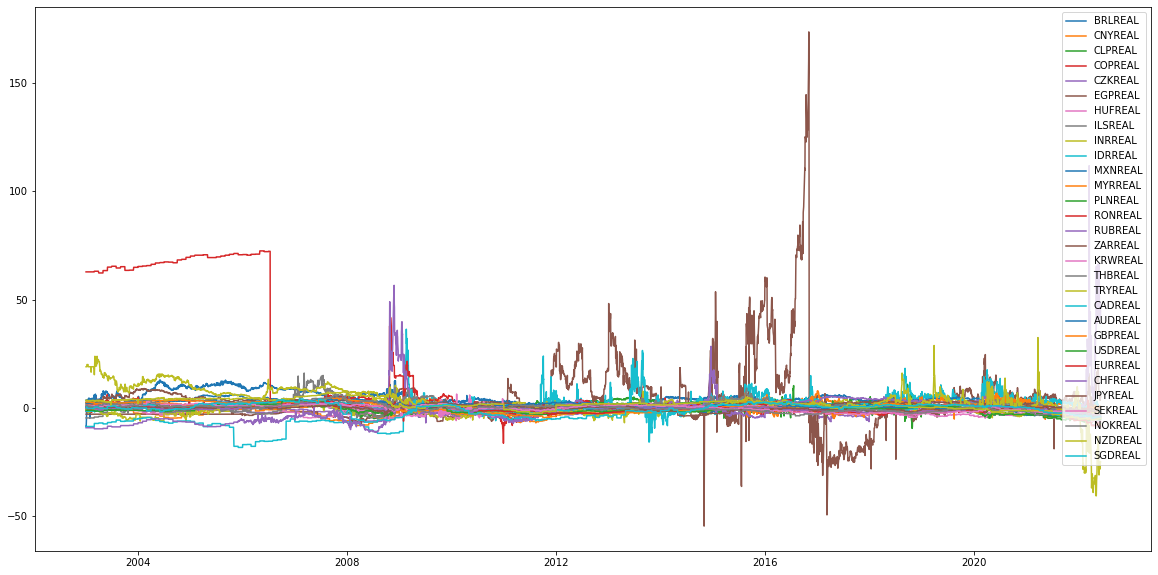

In [13]:
sub_df.plot(figsize=(20,10))

In [14]:
sub_df.to_excel('C:\\B\\MPCA\\REALRATES.xlsx')

In [15]:

zscore_df=(sub_df - sub_df.mean()) / sub_df.std()
zscore_df.to_excel('C:\\B\\MPCA\\REALPCA.xlsx')

globreal=zscore_df.mean(axis=1)
globreal.tail()
#USPOL=zscore_df.to_frame("Zscore")
#USPOL = pd.DataFrame.from_records(data=zscore_df, columns index="TIME")
#USPOL.plot(figsize=(20,10), title="US weekly policy impulse")


2022-05-30   -1.64
2022-05-31   -1.74
2022-06-01   -1.72
2022-06-02   -1.71
2022-06-03   -1.70
dtype: float64

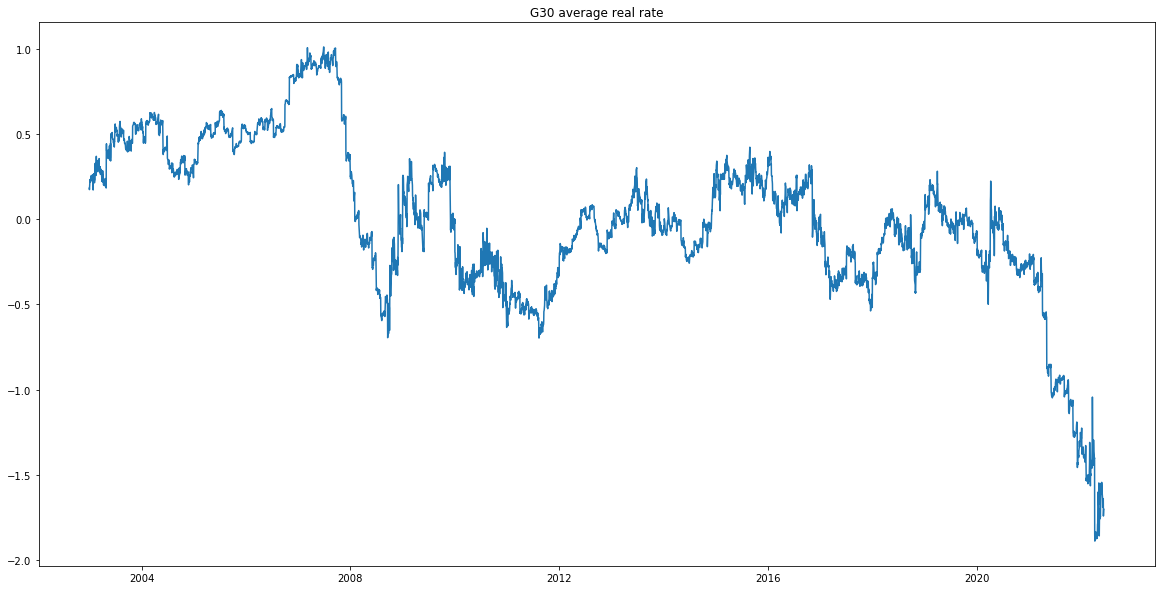

In [16]:
globreal.plot(figsize=(20,10), title="G30 average real rate")
#zscore_df.to_excel('C:\\B\\MPCA\\USPOLICY.xlsx')

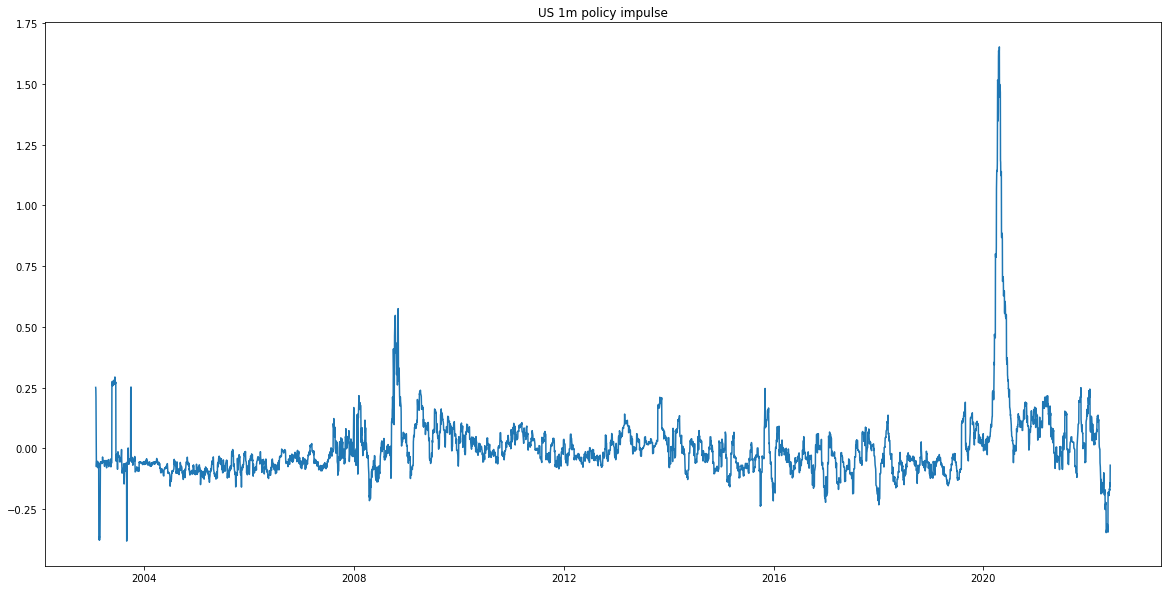

In [72]:
zscore_df.rolling(20).mean().plot(figsize=(20,10), title="US 1m policy impulse")

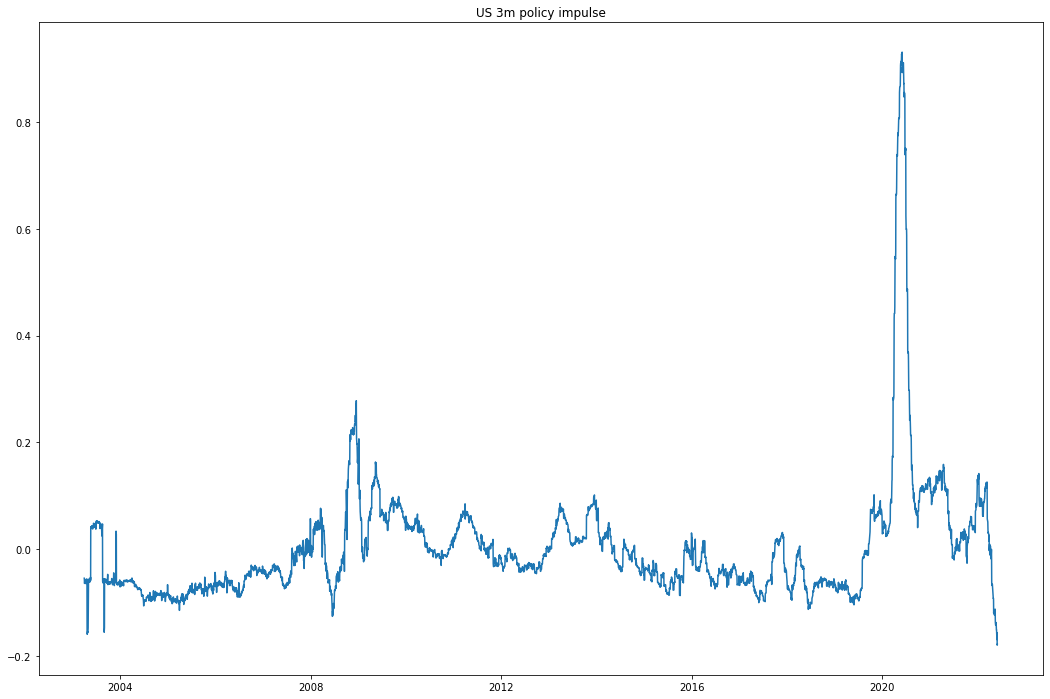

In [94]:
zscore_df.rolling(65).mean().plot(figsize=(18,12), title="US 3m policy impulse")

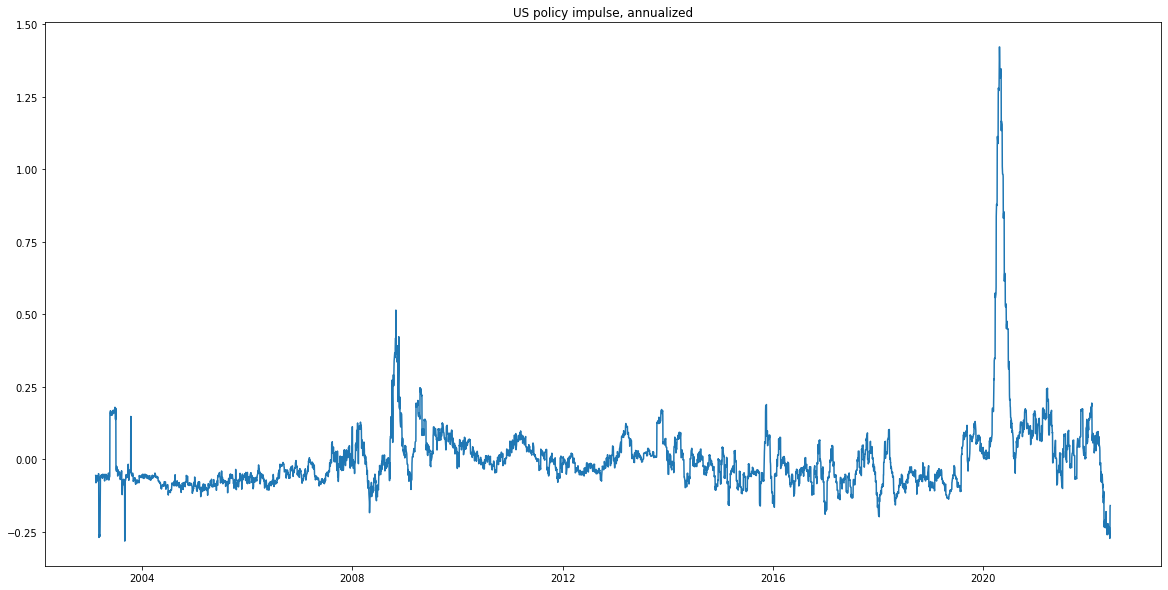

In [79]:
zscore_df.rolling(30).mean().plot(figsize=(20,10), title="US policy impulse, annualized")

In [89]:
x1=zscore_df.rolling(65).mean()
df["FCI"] = -df["FCI"]
x2=df["FCI"]

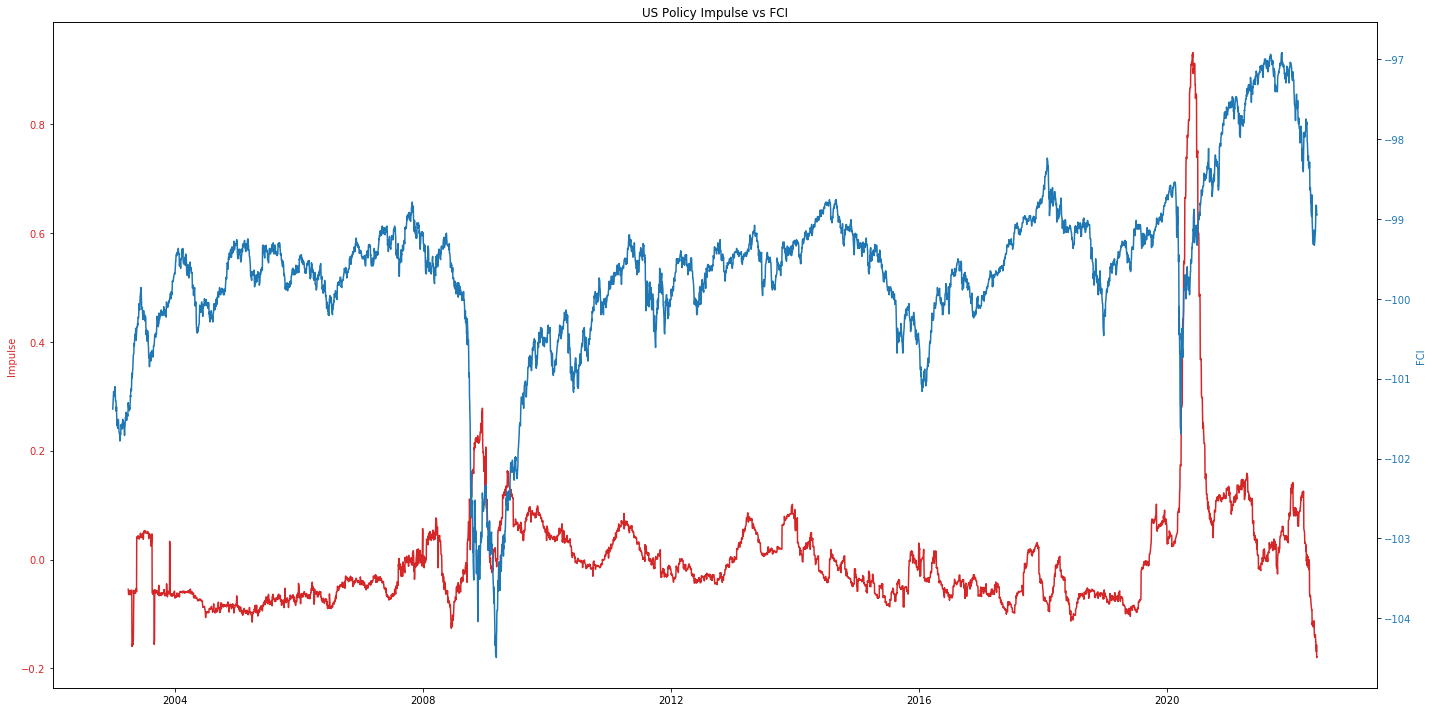

In [90]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("US Policy Impulse vs FCI")
color = "tab:red"
ax1.set_ylabel("Impulse", color=color)
ax1.plot(x1.index, x1,color=color)
ax1.tick_params(axis="y", labelcolor=color)

ax2 = ax1.twinx()

color = "tab:blue"
ax2.set_ylabel("FCI", color=color)
ax2.plot(x2.index, x2, color=color)
ax2.tick_params(axis="y", labelcolor=color)

fig.tight_layout()

plt.show()


In [95]:
USPOLICY3m = zscore_df.rolling(65).mean()
USPOLICY3m.tail()

2022-05-27   -0.15
2022-05-30   -0.17
2022-05-31   -0.16
2022-06-01   -0.18
2022-06-02   -0.18
dtype: float64

In [96]:
USPOLICY3m.to_excel('C:\\B\\MPCA\\USPOLICY3M.xlsx')